In [1]:
import scraping_class
logfile = 'log.txt'## name your log file.
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [2]:
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
with open('df_final.pkl', 'rb') as f:
    df = pickle.load(f)

In [5]:
df.columns.values

array(['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS', 'Eksamenstype',
       'Antal tilmeldte', 'Fremmødte', 'Antal bestået',
       'Eksamensgennemsnit', 12, 10, 7, 4, 2, 0, -3, 'Ej mødt',
       'Ikke bestået', 'Year', 'ID', 'Re-exam_dummy', 'URL_E', 'level_0',
       'Course Name', 'Credit', 'Type of assessment', 'Aid',
       'Marking scale', 'Censorship form', 'Exam period', 'Re-exam',
       'Language', 'Course code', 'Level', 'Duration', 'Placement',
       'Schedule', 'Study board', 'Course id', 'Category', 'Lectures',
       'Preparation', 'Exam', 'Total', 'Content', 'Learning\r\nOutcome',
       'Class Instruction', 'Practical exercises',
       'Exam registration requirements', 'Field Work', 'Course capacity',
       'Seminar', 'Guidance', 'Continuing and further education', 'Price',
       'Class Seminar', 'Class Exercises', 'Study Groups', 'Exercises',
       'Exam Preparation', 'Excursions', 'Øvelseshold', 'Øvelser',
       'Course Preparation', 'Theory exercises', '

### Faculties

In [6]:
# note: no NaN's
print(df['Fakultet'].unique())

['Det Natur- og Biovidenskabelige Fakultet'
 'Det Samfundsvidenskabelige Fakultet' 'Det Humanistiske Fakultet'
 'Det Sundhedsvidenskabelige Fakultet' 'Det Juridiske Fakultet'
 'Det Teologiske Fakultet']


In [7]:
print(sum(df['Fakultet'] == 'Det Natur- og Biovidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Samfundsvidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Humanistiske Fakultet'))
print(sum(df['Fakultet'] == 'Det Sundhedsvidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Juridiske Fakultet'))
print(sum(df['Fakultet'] == 'Det Teologiske Fakultet'))

5277
2225
1976
2869
1264
373


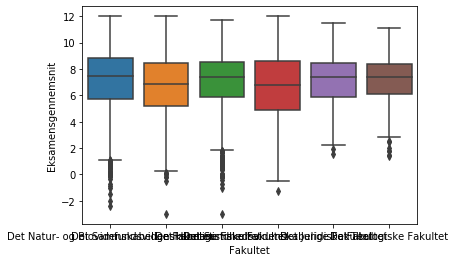

In [8]:
a4_dims = (20, 8.27)
#df = mylib.load_data()
#fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x='Fakultet', y='Eksamensgennemsnit', data=df)

In [9]:
df['Fakultet'].unique()

array(['Det Natur- og Biovidenskabelige Fakultet',
       'Det Samfundsvidenskabelige Fakultet', 'Det Humanistiske Fakultet',
       'Det Sundhedsvidenskabelige Fakultet', 'Det Juridiske Fakultet',
       'Det Teologiske Fakultet'], dtype=object)

C:\Users\jens_\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jens_\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([   4.,   17.,  113.,  270.,  415.,  698., 1069., 1346.,  788.,
         154.]),
 array([-2.4, -0.96, 0.48, 1.9200000000000004, 3.36, 4.799999999999999,
        6.24, 7.68, 9.12, 10.559999999999999, 12.0], dtype=object),
 <a list of 10 Patch objects>)

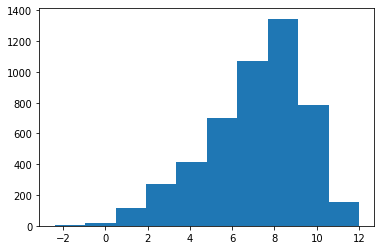

In [10]:
#Plotting the average distr. 

df_natur = df[df['Fakultet']=='Det Natur- og Biovidenskabelige Fakultet']
#titanic_v2=titanic[titanic['class']==gruppering]
plt.hist(df_natur['Eksamensgennemsnit'])

In [84]:
y_inner = []
y = []
x = ['-3','00','02','4','7','10','12']

# Looking at each faculty 
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_faculty = df[df['Fakultet']==i]
   
    for k in [-3,0,2,4,7,10,12]:
        y_inner.append(df_faculty[k].sum(skipna = True)) 
    
    y.append(y_inner)
    y_inner=[]
    
y

[[5899, 14306, 13294, 25233, 43837, 40131, 26589],
 [4427, 2913, 4351, 10436, 19351, 18126, 9993],
 [1859, 1721, 2316, 6332, 12236, 11929, 8080],
 [2800, 12295, 12721, 25081, 44330, 38920, 26456],
 [5632, 3067, 6047, 16093, 23007, 17043, 10103],
 [161, 274, 368, 706, 1290, 1162, 914]]

In [91]:
# calc frequencies 
y_freq_inner = []
y_freq = []

# running through each faculty
for i in range(len(y)):
    
    # calc frequencies 
    for q in range(len(y[i])):
        y_freq_inner.append(y[i][q]/sum(y[i]))

    y_freq.append(y_freq_inner)
    y_freq_inner = []

y_freq

[[0.03484573717134604,
  0.08450637666948237,
  0.07852843362533891,
  0.14905280319453715,
  0.2589477166265971,
  0.23705615840367655,
  0.15706277430902185],
 [0.06360906360906361,
  0.04185525238156817,
  0.06251706251706252,
  0.14994899205425521,
  0.27804359383306754,
  0.26044226044226043,
  0.14358377516272253],
 [0.04180064308681672,
  0.03869763676837632,
  0.05207654082252153,
  0.14237852179974367,
  0.27513322690171566,
  0.26823016212083733,
  0.18168326849998875],
 [0.01721985449222954,
  0.0756136110649865,
  0.07823348892701856,
  0.15424684661414612,
  0.2726271963001913,
  0.2393559774419906,
  0.1627030251594374],
 [0.06953773212169104,
  0.03786793757408139,
  0.07466169498222047,
  0.1986986369024101,
  0.2840650928486764,
  0.21042819043856184,
  0.12474071513235875],
 [0.033025641025641025,
  0.056205128205128206,
  0.07548717948717949,
  0.1448205128205128,
  0.26461538461538464,
  0.23835897435897435,
  0.1874871794871795]]

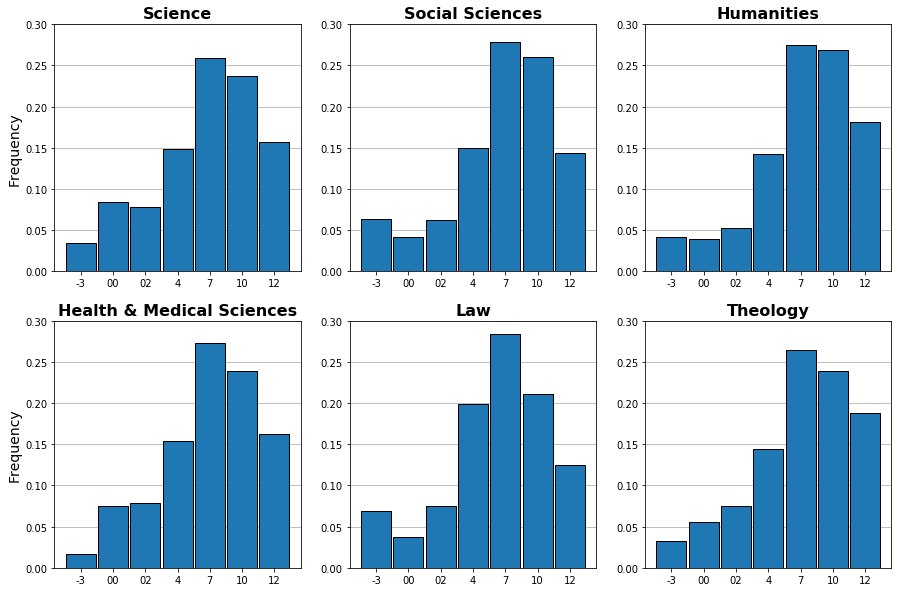

In [86]:
Faculty_names = ['Science','Social Sciences','Humanities','Health & Medical Sciences','Law','Theology']

f, ax = plt.subplots(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.title(Faculty_names[0], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y_freq[0], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 2)
plt.title(Faculty_names[1], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_freq[1], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 3)
plt.title(Faculty_names[2], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_freq[2], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 4)
plt.title(Faculty_names[3], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y_freq[3], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 5)
plt.title(Faculty_names[4], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_freq[4], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 6)
plt.title(Faculty_names[5], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_freq[5], width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_gades_split_faculty.png')

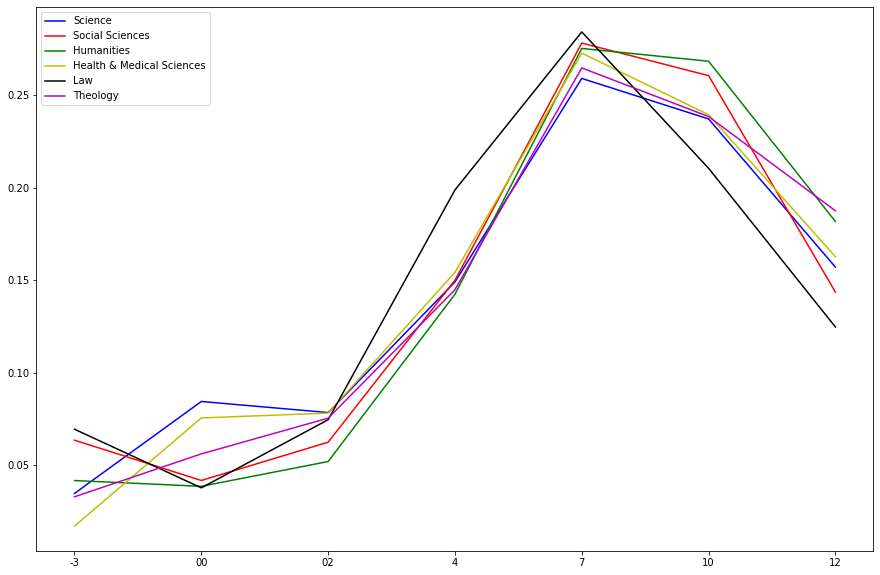

In [14]:
f, axs = plt.subplots(figsize=(15,10))


plt.plot(x, y_freq[0],'b-', label = Faculty_names[0])
plt.plot(x, y_freq[1],'r-',label = Faculty_names[1])
plt.plot(x, y_freq[2],'g-',label = Faculty_names[2])
plt.plot(x, y_freq[3], 'y-',label = Faculty_names[3])
plt.plot(x, y_freq[4],'k-',label = Faculty_names[4])
plt.plot(x, y_freq[5],'m-',label = Faculty_names[5])
plt.legend(loc='best')
plt.show()

### Faculties,  weighted against ECTS

In [136]:
# We need to weight the grades according to ECTS points. If we do not small courses will have the same weight as
# bigger courses. 
df['Weigthed_m3'] = df['Credit_edit'] * df[-3]
df['Weigthed_00'] = df['Credit_edit'] * df[0]
df['Weigthed_02'] = df['Credit_edit'] * df[2]
df['Weigthed_4'] = df['Credit_edit'] * df[4]
df['Weigthed_7'] = df['Credit_edit'] * df[7]
df['Weigthed_10'] = df['Credit_edit'] * df[10]
df['Weigthed_12'] = df['Credit_edit'] * df[12]
df[['Credit_edit',-3,'Weigthed_m3',0,'Weigthed_00',2,'Weigthed_02',4,'Weigthed_4',7,'Weigthed_7',10,'Weigthed_10',12,'Weigthed_12']]

,Credit_edit,-3,Weigthed_m3,0,Weigthed_00,2,Weigthed_02,4,Weigthed_4,7,Weigthed_7,10,Weigthed_10,12,Weigthed_12
0,7.5,0,0,0,0,0,0,3,22.5,6,45,2,15,3,22.5
1,7.5,1,7.5,0,0,1,7.5,1,7.5,4,30,4,30,5,37.5
2,7.5,1,7.5,0,0,2,15,4,30,4,30,7,52.5,9,67.5
3,7.5,0,0,1,7.5,2,15,4,30,3,22.5,4,30,5,37.5
4,10.0,0,0,0,0,0,0,1,10,5,50,3,30,13,130
5,7.5,0,0,0,0,0,0,0,0,4,30,10,75,12,90
6,7.5,0,0,0,0,0,0,0,0,6,45,7,52.5,5,37.5
7,7.5,0,0,0,0,0,0,3,22.5,8,60,7,52.5,2,15
8,7.5,0,0,0,0,0,0,1,7.5,15,112.5,1,7.5,1,7.5
9,5.0,0,0,0,0,3,15,3,15,7,35,8,40,1,5


In [83]:
y_ects_inner = []
y_ects = []
x = ['-3','00','02','4','7','10','12']

# Looking at each faculty 
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_faculty = df[df['Fakultet']==i]
   
    for k in ['Weigthed_m3','Weigthed_00','Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']:
        y_ects_inner.append(df_faculty[k].sum(skipna = True)) 
    
    y_ects.append(y_ects_inner)
    y_ects_inner=[]
    
y_ects

[[48285.0, 115713.5, 108702.0, 208269.0, 366752.0, 342256.0, 223004.5],
 [38205.0, 24412.5, 36517.5, 93197.5, 183510.0, 178880.0, 103210.0],
 [23497.5, 18370.5, 25540.0, 72518.0, 145232.0, 146089.5, 100279.0],
 [23635.5, 101208.0, 101400.0, 195891.0, 333823.5, 271220.5, 164145.0],
 [56747.5, 30547.5, 60145.0, 160232.5, 227900.0, 169197.5, 102152.5],
 [2109.5, 3406.0, 4655.0, 8854.5, 16215.0, 14560.5, 11756.0]]

In [89]:
# calc frequencies 
y_ects_freq_inner = []
y_ects_freq = []

# running through each faculty
for i in range(len(y_ects)):
    
    # calc frequencies 
    for q in range(len(y_ects[i])):
        y_ects_freq_inner.append(y_ects[i][q]/sum(y_ects[i]))

    y_ects_freq.append(y_ects_freq_inner)
    y_ects_freq_inner = []

y_ects_freq

[[0.034172409839615794,
  0.08189311682668286,
  0.07693091631740531,
  0.14739678212461305,
  0.2595588620378745,
  0.2422224770025379,
  0.15782543585127057],
 [0.058068266881481,
  0.037104870180451645,
  0.05550341410403043,
  0.14165206917122958,
  0.2789191900384918,
  0.2718819939735459,
  0.15687019565076965],
 [0.04420757949039229,
  0.034561776317831756,
  0.04805028535736224,
  0.1364334609845417,
  0.27323567122241316,
  0.27484894920573105,
  0.1886622774217278],
 [0.01983969929242561,
  0.08495425465878916,
  0.08511541995100408,
  0.16443140758996191,
  0.2802123016963906,
  0.22766318300612723,
  0.13778373380530143],
 [0.07032583674392522,
  0.03785679541715592,
  0.07453627826711982,
  0.19857235360273137,
  0.2824310884874322,
  0.20968246640786445,
  0.12659518107377102],
 [0.03426932980270158,
  0.05533128101825153,
  0.07562158342335903,
  0.14384346088552794,
  0.26341653602787685,
  0.2365387895673081,
  0.19097901927497501]]

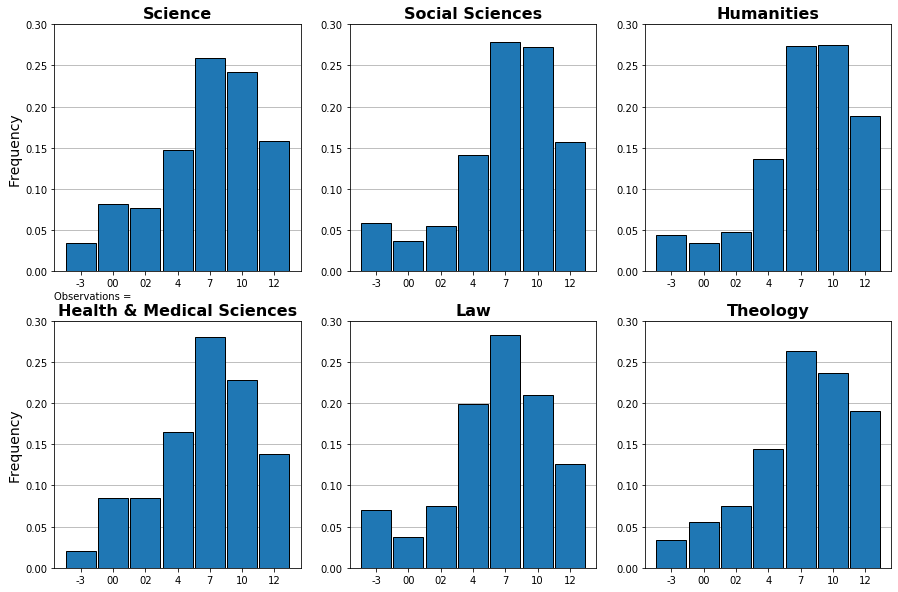

In [137]:
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.title(Faculty_names[0], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Observations =' , (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[0], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 2)
plt.title(Faculty_names[1], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_ects_freq[1], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 3)
plt.title(Faculty_names[2], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_ects_freq[2], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 4)
plt.title(Faculty_names[3], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y_ects_freq[3], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 5)
plt.title(Faculty_names[4], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_ects_freq[4], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 6)
plt.title(Faculty_names[5], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_ects_freq[5], width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_gades_split_faculty_ECTS_weight.png')

### Economics

In [15]:
y_inner = []
y = []
x = ['-3','00','02','4','7','10','12']

# Looking at each faculty 
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_faculty = df[df['Fakultet']==i]
   
    for k in [-3,0,2,4,7,10,12]:
        y_inner.append(df_faculty[k].sum(skipna = True)) #<= Do we have a list in a list
    
    y.append(y_inner)
    y_inner=[]

In [16]:
df_polit = df[df['Institut']=='Økonomisk Institut']
print(len(df_polit))

727


In [17]:
y_polit = []

for k in [-3,0,2,4,7,10,12]:
    y_polit.append(df_polit[k].sum(skipna = True)) #<= Do we have a list in a list

y_polit

[1806, 2169, 2948, 5086, 7640, 6163, 3468]

In [18]:
y_polit_freq = []

# calc frequencies 
for q in range(len(y_polit)):
    y_polit_freq.append(y_polit[q]/sum(y_polit))
    
y_polit_freq

[0.06168032786885246,
 0.07407786885245901,
 0.10068306010928962,
 0.17370218579234972,
 0.2609289617486339,
 0.21048497267759564,
 0.11844262295081967]

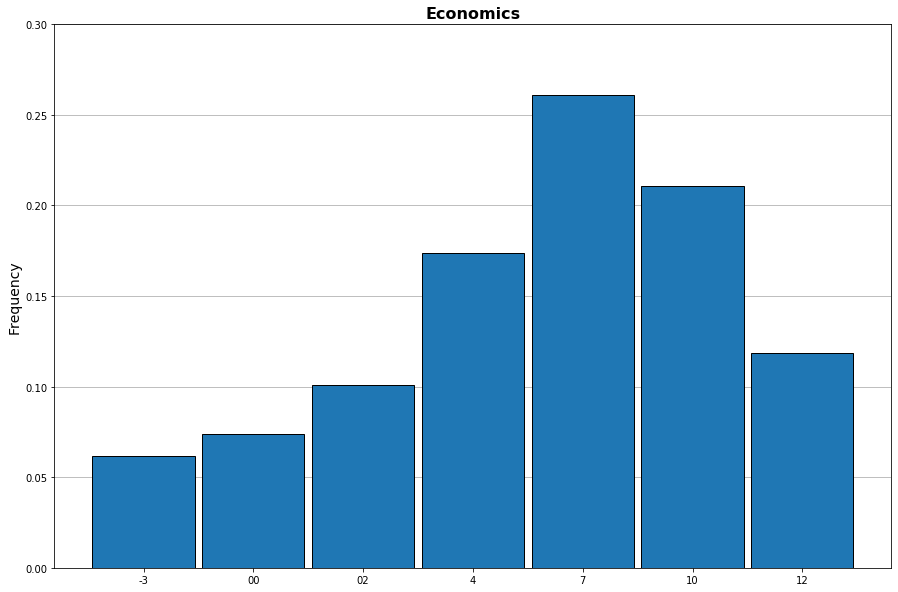

In [19]:
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(1, 1, 1)
plt.title("Economics", fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y_polit_freq, width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_gades_economics.png')

### Preparation and grades

In [20]:
df.columns.values

array(['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS', 'Eksamenstype',
       'Antal tilmeldte', 'Fremmødte', 'Antal bestået',
       'Eksamensgennemsnit', 12, 10, 7, 4, 2, 0, -3, 'Ej mødt',
       'Ikke bestået', 'Year', 'ID', 'Re-exam_dummy', 'URL_E', 'level_0',
       'Course Name', 'Credit', 'Type of assessment', 'Aid',
       'Marking scale', 'Censorship form', 'Exam period', 'Re-exam',
       'Language', 'Course code', 'Level', 'Duration', 'Placement',
       'Schedule', 'Study board', 'Course id', 'Category', 'Lectures',
       'Preparation', 'Exam', 'Total', 'Content', 'Learning\r\nOutcome',
       'Class Instruction', 'Practical exercises',
       'Exam registration requirements', 'Field Work', 'Course capacity',
       'Seminar', 'Guidance', 'Continuing and further education', 'Price',
       'Class Seminar', 'Class Exercises', 'Study Groups', 'Exercises',
       'Exam Preparation', 'Excursions', 'Øvelseshold', 'Øvelser',
       'Course Preparation', 'Theory exercises', '

In [21]:
df[['Total_edit','Preparation_edit','Lectures_edit']]
print(len(df['Total_edit']))
print(len(df['Preparation_edit']))
print(len(df['Lectures_edit']))

13984
13984
13984


In [22]:
df['Share Preparation'] = (df['Preparation_edit']+df['Course Preparation_edit'])/ df['Total_edit']
df[['Preparation_edit','Total_edit','Share Preparation']].head()

,Preparation_edit,Total_edit,Share Preparation
0,86.0,206.0,0.417476
1,0.0,28.0,0.000000
2,0.0,28.0,0.000000
3,168.0,275.0,0.610909
4,168.0,275.0,0.610909


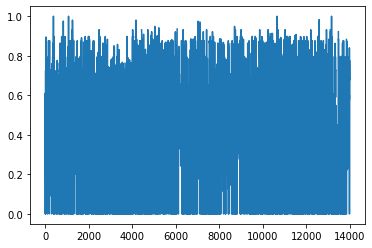

In [23]:
plt.plot(df['Share Preparation'])

C:\Users\jens_\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jens_\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2621.,  300.,  694.,  969., 1296., 1710., 2148., 2190., 1647.,
          93.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

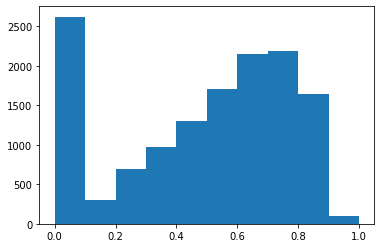

In [24]:
plt.hist(df['Share Preparation'])
# We not that there is a lot of courses with very low share preparation. 

In [58]:
df_very_low_prep = df[df['Share Preparation']<=0.1] #if we check at 0.1 we have 2621, at 0.05 we have 2448.
#print(len(df_very_low_prep))
#print(df_very_low_prep['URL_C'])
df_very_low_prep['URL_C'][377];

In [43]:
df_prep = df[df['Share Preparation']>0.1] 
len(df_prep)

11047

In [40]:
# Intern note, overvej finere inddeling, evt. 5%-point intervaller
list_share_prep_level = []

for i in tqdm_notebook(df_prep.index):
    if 0.1 < df_prep['Share Preparation'][i] <= 0.2:
        #df['Share Preparation level'][i] = '10-20 pct.'
        list_share_prep_level.append('10-20 pct.')
        
    elif 0.2 < df_prep['Share Preparation'][i] <= 0.3:
        #df_prep['Share Preparation level'][i] = '20-30 pct.'
        list_share_prep_level.append('20-30 pct.')
        
    elif 0.3 < df_prep['Share Preparation'][i] <= 0.4:
        #df_prep['Share Preparation level'][i] = '30-40 pct.'
        list_share_prep_level.append('30-40 pct.')
        
    elif 0.4 < df_prep['Share Preparation'][i] <= 0.5:
        #df_prep['Share Preparation level'][i] = '40-50 pct.'
        list_share_prep_level.append('40-50 pct.')
        
    elif 0.5 < df_prep['Share Preparation'][i] <= 0.6:
        #df_prep['Share Preparation level'][i] = '50-60 pct.'
        list_share_prep_level.append('50-60 pct.')
        
    elif 0.6 < df_prep['Share Preparation'][i] <= 0.7:
        #df_prep['Share Preparation level'][i]= '60-70 pct.'
        list_share_prep_level.append('60-70 pct.')
        
    elif 0.7 < df['Share Preparation'][i] <= 0.8:
        #df_prep['Share Preparation level'][i] = '70-80 pct.'
        list_share_prep_level.append('70-80 pct.')
        
    elif 0.8 < df_prep['Share Preparation'][i] <= 0.9:
        #df_prep['Share Preparation level'][i] = '80-90 pct.'
        list_share_prep_level.append('80-90 pct.')
    
    elif 0.9 < df_prep['Share Preparation'][i] <= 1:
        #df_prep['Share Preparation level'][i] = '90-100 pct.'
        list_share_prep_level.append('90-100 pct.')

In [56]:
print(len(list_share_prep_level))
df_prep['Share Preparation level'] = list_share_prep_level
df_prep['Share Preparation level'];

11047


C:\Users\jens_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
#print(df_prep[df_prep['Share Preparation level']=='10-20 pct.'].loc[:,'Eksamensgennemsnit'].mean())
#print(df_prep[df_prep['Share Preparation level']=='20-30 pct.'].loc[:,'Eksamensgennemsnit'].mean()) 
#print(df_prep[df_prep['Share Preparation level']=='30-40 pct.'].loc[:,'Eksamensgennemsnit'].mean()) 
#print(df_prep[df_prep['Share Preparation level']=='40-50 pct.'].loc[:,'Eksamensgennemsnit'].mean())    
#print(df_prep[df_prep['Share Preparation level']=='50-60 pct.'].loc[:,'Eksamensgennemsnit'].mean())    
#print(df_prep[df_prep['Share Preparation level']=='60-70 pct.'].loc[:,'Eksamensgennemsnit'].mean())
#print(df_prep[df_prep['Share Preparation level']=='70-80 pct.'].loc[:,'Eksamensgennemsnit'].mean())  
#print(df_prep[df_prep['Share Preparation level']=='80-90 pct.'].loc[:,'Eksamensgennemsnit'].mean()) 
#print(df_prep[df_prep['Share Preparation level']=='90-100 pct.'].loc[:,'Eksamensgennemsnit'].mean())  

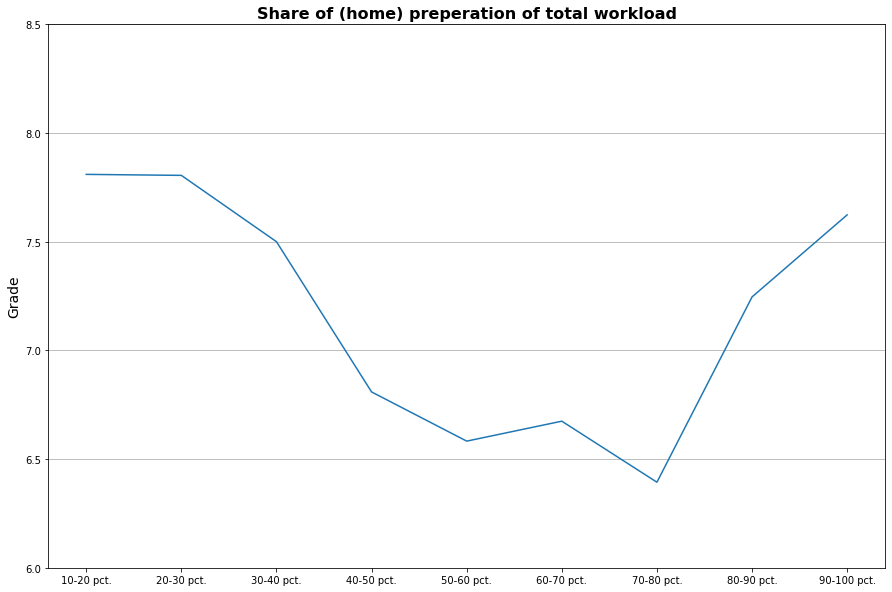

In [55]:
list_share=[df_prep[df_prep['Share Preparation level']=='10-20 pct.'].loc[:,'Eksamensgennemsnit'].mean(),df_prep[df_prep['Share Preparation level']=='20-30 pct.'].loc[:,'Eksamensgennemsnit'].mean(),df_prep[df_prep['Share Preparation level']=='30-40 pct.'].loc[:,'Eksamensgennemsnit'].mean(),df_prep[df_prep['Share Preparation level']=='40-50 pct.'].loc[:,'Eksamensgennemsnit'].mean(),df_prep[df_prep['Share Preparation level']=='50-60 pct.'].loc[:,'Eksamensgennemsnit'].mean(),df_prep[df_prep['Share Preparation level']=='60-70 pct.'].loc[:,'Eksamensgennemsnit'].mean(),df_prep[df_prep['Share Preparation level']=='70-80 pct.'].loc[:,'Eksamensgennemsnit'].mean(),df_prep[df_prep['Share Preparation level']=='80-90 pct.'].loc[:,'Eksamensgennemsnit'].mean(),df_prep[df_prep['Share Preparation level']=='90-100 pct.'].loc[:,'Eksamensgennemsnit'].mean()]
prep_level = ['10-20 pct.','20-30 pct.','30-40 pct.','40-50 pct.','50-60 pct.','60-70 pct.','70-80 pct.','80-90 pct.','90-100 pct.']

f, ax = plt.subplots(figsize=(15,10))

plt.subplot(1, 1, 1)
plt.ylim([6,8.5])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Grade',fontsize=14)
plt.title("Share of (home) preperation of total workload", fontsize = 16, weight = 'bold')
plt.plot(prep_level, list_share)

#ville forvente at den var negativ hele vejen. 

f.savefig('figure_grade_and_share_or_prep.png')

In [131]:
df_test = df_prep[df_prep['Share Preparation level']=='80-90 pct.']
print(len(df_test))
#print(df_test.columns.values)
colm = 22

df_test[['URL_E','URL_C','Fakultet','Institut','Kursus','Type of assessmet_edit']].iloc[colm]
df_test['URL_C'].iloc[colm]

1646


'https://kurser.ku.dk/archive/2017-2018/course/JJUS00008U'

### Preparation and grades (ECTS weighted)

In [117]:
list_weighted_grades_share_prep = []


for i in df_prep['Share Preparation level'].unique():
    print(i)
    df_test = df_prep[df_prep['Share Preparation level']==i]
    list_weighted_grades_share_prep.append((df_test['Eksamensgennemsnit'] * df_test['Credit_edit']/sum(df_test['Credit_edit'])).sum(skipna = True))
    
list_weighted_grades_share_prep

40-50 pct.
60-70 pct.
10-20 pct.
70-80 pct.
30-40 pct.
80-90 pct.
50-60 pct.
20-30 pct.
90-100 pct.


[5.648798082385686,
 5.99901161356598,
 6.622786893412465,
 5.530059450656822,
 6.838189508886624,
 6.84866783118873,
 6.104158143013599,
 6.934682232558989,
 5.722258596681403]

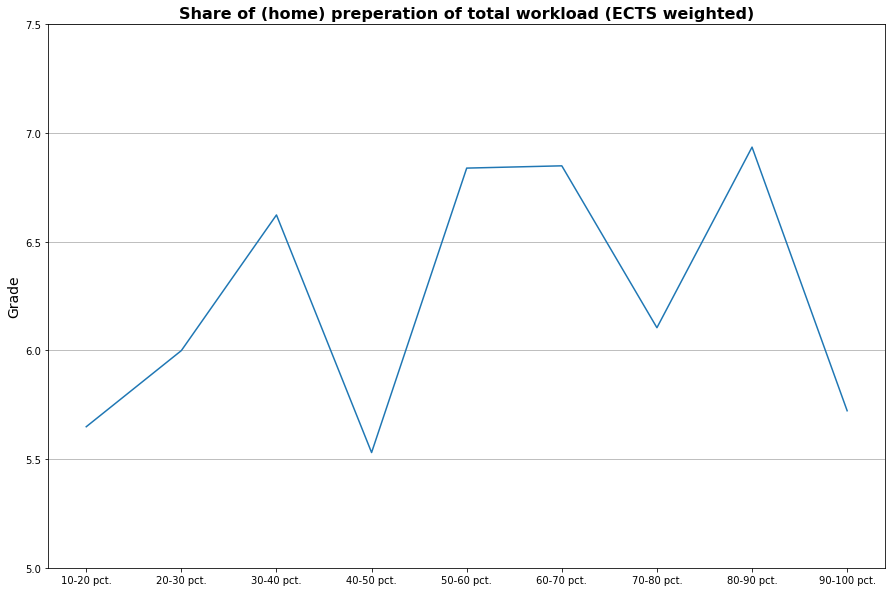

In [119]:
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(1, 1, 1)
plt.ylim([5,7.5])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Grade',fontsize=14)
plt.title("Share of (home) preperation of total workload (ECTS weighted)", fontsize = 16, weight = 'bold')
plt.plot(prep_level, list_weighted_grades_share_prep)

#ville forvente at den var negativ hele vejen. 

f.savefig('figure_grade_and_share_or_prep_ECTS_weighted.png')

### Lectures and grades